<div style="background-color: #4b4032; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: yellow; font-size: 50px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">AMAZON DATA ANALYSIS
</h1>
</div>

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [84]:
#load the data
df = pd.read_csv("C:/Users/nagad/.vscode/codes/internships/amazon/Amazon 2_Raw.csv")
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [85]:
# Display the first few rows of the DataFrame
print(df.head())

         Order ID  Order Date   Ship Date                   EmailID  \
0  CA-2013-138688  13-06-2013  17-06-2013   DarrinVanHuff@gmail.com   
1  CA-2011-115812  09-06-2011  14-06-2011  BrosinaHoffman@gmail.com   
2  CA-2011-115812  09-06-2011  14-06-2011  BrosinaHoffman@gmail.com   
3  CA-2011-115812  09-06-2011  14-06-2011  BrosinaHoffman@gmail.com   
4  CA-2011-115812  09-06-2011  14-06-2011  BrosinaHoffman@gmail.com   

                              Geography     Category  \
0  United States,Los Angeles,California       Labels   
1  United States,Los Angeles,California  Furnishings   
2  United States,Los Angeles,California          Art   
3  United States,Los Angeles,California       Phones   
4  United States,Los Angeles,California      Binders   

                                        Product Name   Sales  Quantity  Profit  
0  Self-Adhesive Address Labels for Typewriters b...   14.62       2.0    6.87  
1  Eldon Expressions Wood and Plastic Desk Access...   48.86       7.0   1

In [86]:
# Check the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      3203 non-null   object 
 1   Order Date    3203 non-null   object 
 2   Ship Date     3203 non-null   object 
 3   EmailID       3203 non-null   object 
 4   Geography     3203 non-null   object 
 5   Category      3203 non-null   object 
 6   Product Name  3203 non-null   object 
 7   Sales         3203 non-null   float64
 8   Quantity      3203 non-null   float64
 9   Profit        3203 non-null   float64
dtypes: float64(3), object(7)
memory usage: 250.4+ KB
None


In [87]:
# Get summary statistics
print(df.describe())

              Sales     Quantity       Profit
count   3203.000000  3203.000000  3203.000000
mean     226.493266     3.828910    33.849138
std      524.876911     2.260947   174.109155
min        0.990000     1.000000 -3399.980000
25%       19.440000     2.000000     3.850000
50%       60.840000     3.000000    11.170000
75%      215.810000     5.000000    33.000000
max    13999.960000    14.000000  6719.980000


In [88]:
print(df["Order ID"].value_counts())

Order ID
CA-2013-165330    11
CA-2011-106439     9
CA-2012-104346     9
CA-2012-164882     9
CA-2014-117457     9
                  ..
CA-2014-123701     1
US-2011-167262     1
CA-2014-108091     1
CA-2012-144722     1
CA-2014-119914     1
Name: count, Length: 1611, dtype: int64


In [89]:
data = df.drop(columns=["Order ID","EmailID"])
print(data.head())

   Order Date   Ship Date                             Geography     Category  \
0  13-06-2013  17-06-2013  United States,Los Angeles,California       Labels   
1  09-06-2011  14-06-2011  United States,Los Angeles,California  Furnishings   
2  09-06-2011  14-06-2011  United States,Los Angeles,California          Art   
3  09-06-2011  14-06-2011  United States,Los Angeles,California       Phones   
4  09-06-2011  14-06-2011  United States,Los Angeles,California      Binders   

                                        Product Name   Sales  Quantity  Profit  
0  Self-Adhesive Address Labels for Typewriters b...   14.62       2.0    6.87  
1  Eldon Expressions Wood and Plastic Desk Access...   48.86       7.0   14.17  
2                                         Newell 322    7.28       4.0    1.97  
3                     Mitel 5320 IP Phone VoIP phone  907.15       4.0   90.72  
4  DXL Angle-View Binders with Locking Rings by S...   18.50       3.0    5.78  


In [90]:
data["Order Date"]

0       13-06-2013
1       09-06-2011
2       09-06-2011
3       09-06-2011
4       09-06-2011
           ...    
3198    30-09-2013
3199    27-02-2014
3200    27-02-2014
3201    27-02-2014
3202    05-05-2014
Name: Order Date, Length: 3203, dtype: object

In [91]:
data = data.assign(Days_Difference = days_diff)
data.head()

,Order Date,Ship Date,Geography,Category,Product Name,Sales,Quantity,Profit,Days_Difference
0,13-06-2013,17-06-2013,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,4
1,09-06-2011,14-06-2011,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,5
2,09-06-2011,14-06-2011,"United States,Los Angeles,California",Art,Newell 322,7.28,4.0,1.97,5
3,09-06-2011,14-06-2011,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,5
4,09-06-2011,14-06-2011,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,5


In [92]:
# Assuming "data" is a pandas DataFrame
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data["Order Date"] = pd.to_datetime(data["Order Date"])

days_diff = []
for i in range(len(data)):
    day_difference = (data["Ship Date"][i] - data["Order Date"][i]).days
    days_diff.append(day_difference)

print(days_diff)

[4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 4, 5, 6, 6, 6, 6, 5, 5, 4, 4, 5, 5, 5, 6, 3, 4, 4, 4, 4, 7, 7, 4, 4, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 3, 3, 2, 2, 2, 6, 5, 1, 4, 4, 4, 4, 4, 4, 6, 2, 2, 5, 4, 4, 4, 5, 6, 6, 5, 5, 1, 1, 1, 1, 1, 4, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 4, 4, 3, 3, 3, 5, 5, 4, 4, 5, 4, 4, 4, 4, 1, 1, 2, 2, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 7, 4, 3, 3, 3, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 2, 2, 2, 4, 6, 3, 2, 4, 5, 5, 5, 2, 2, 2, 2, 3, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 4, 4, 4, 2, 2, 2, 6, 6, 5, 5, 4, 4, 7, 7, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 5, 5, 2, 2, 2, 2, 4, 4, 6, 6, 6, 3, 3, 2, 6, 6, 2, 2, 2, 2, 0, 0, 6, 6, 2, 2, 2, 2, 5, 5, 7, 7, 0, 3, 6, 7, 2, 2, 4, 4, 4, 1, 4, 4, 1, 7, 7, 5, 5, 5, 2, 3, 3, 3, 0, 5, 3, 6, 3, 3, 3, 1, 1, 4, 4, 3, 3, 2, 4, 4, 3, 3, 2, 3, 1, 5, 5, 7, 7, 1, 6, 4, 7, 7, 7, 2, 2, 2, 5, 5, 7, 7, 3, 3, 3, 

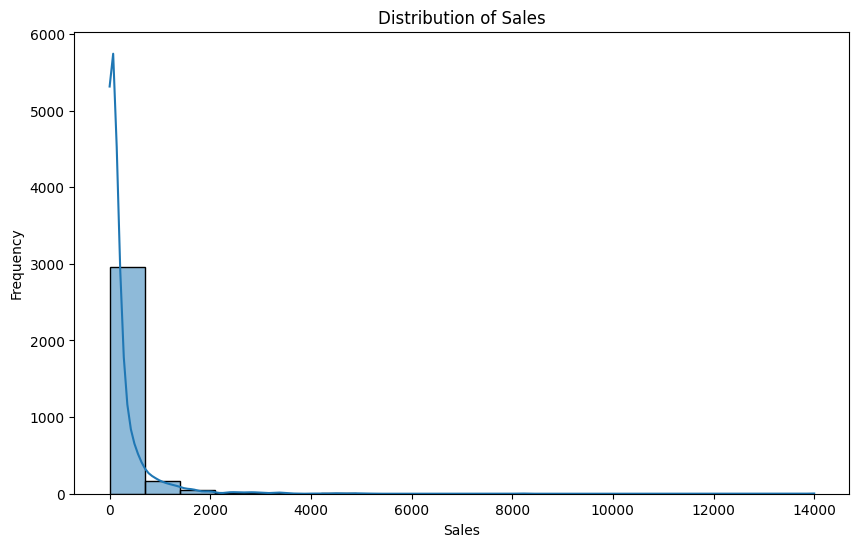

In [93]:
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

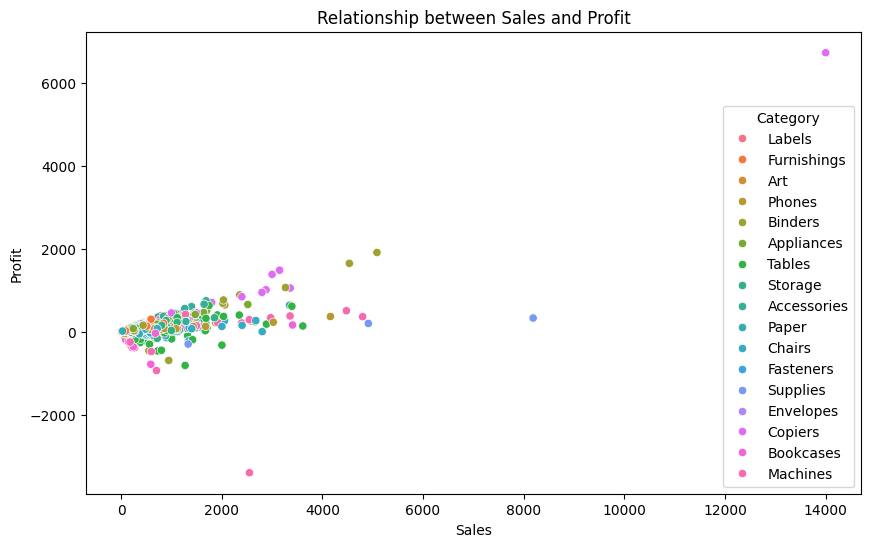

In [94]:
# Visualize the relationship between sales and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

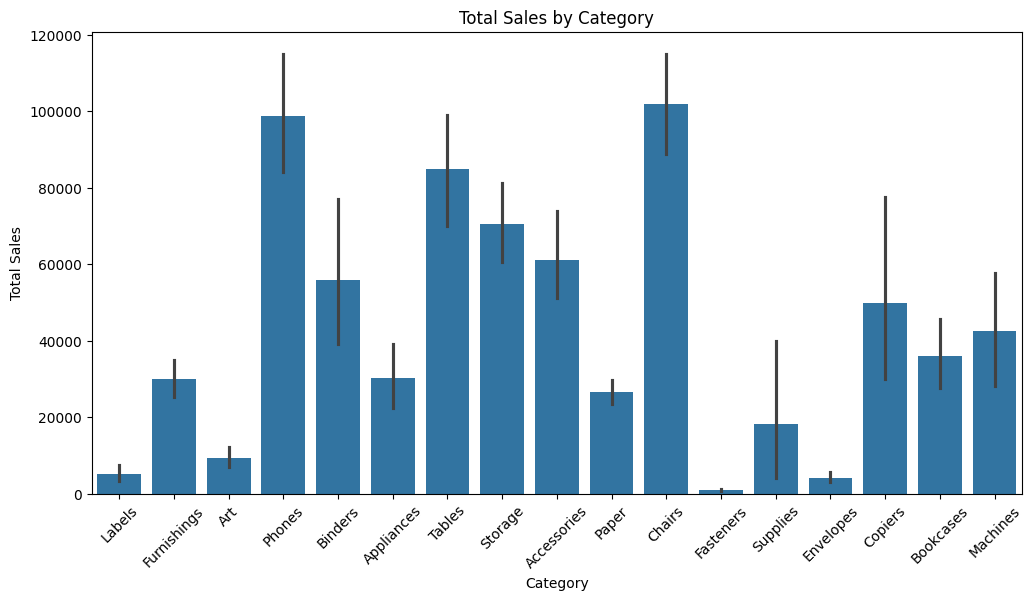

In [95]:
# Visualize sales by category using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show

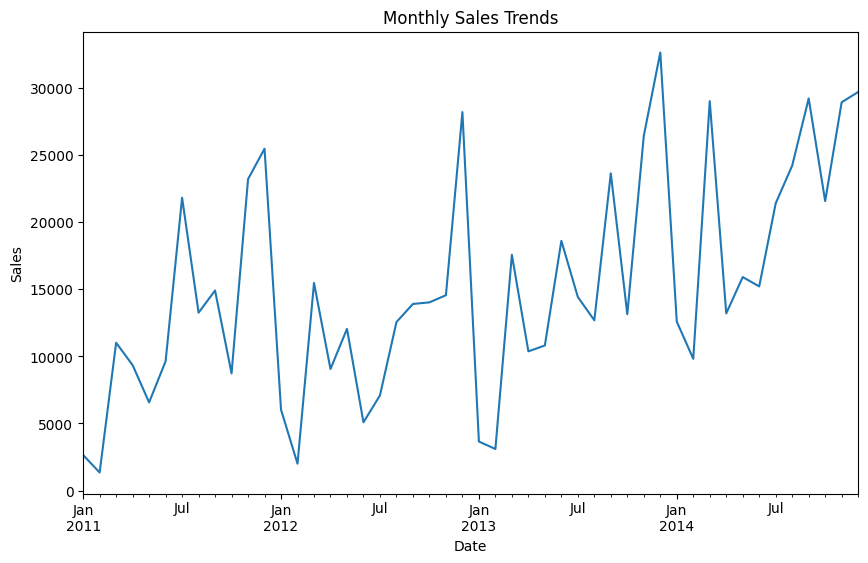

In [96]:
# Assuming data is your DataFrame and Order Date is in datetime format
data.set_index('Order Date')['Sales'].resample('M').sum().plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

<Axes: title={'center': 'Categorywise Sales'}, ylabel='Sales'>

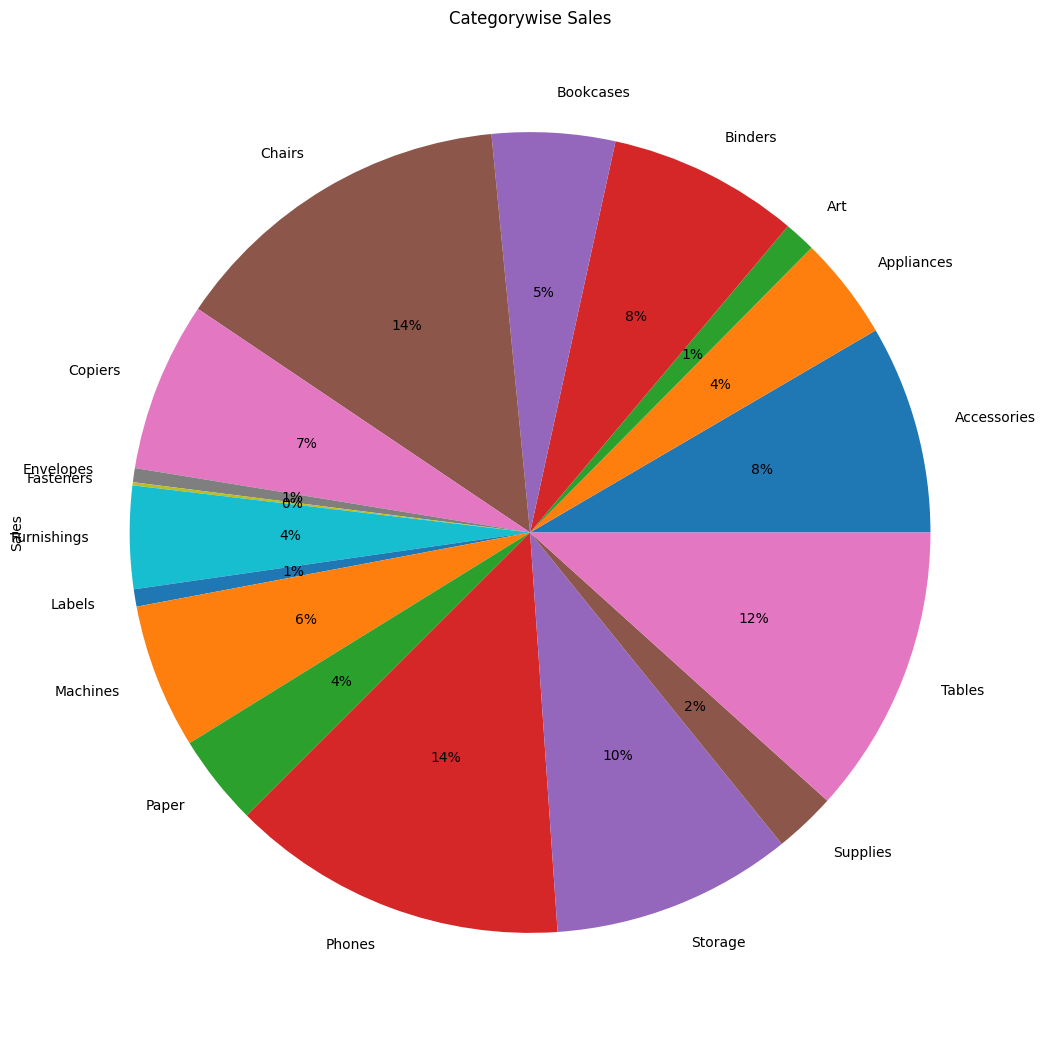

In [97]:
data.groupby('Category')['Sales'].sum().plot(kind="pie",figsize=(13,13),title= "Categorywise Sales",autopct='%1.0f%%')

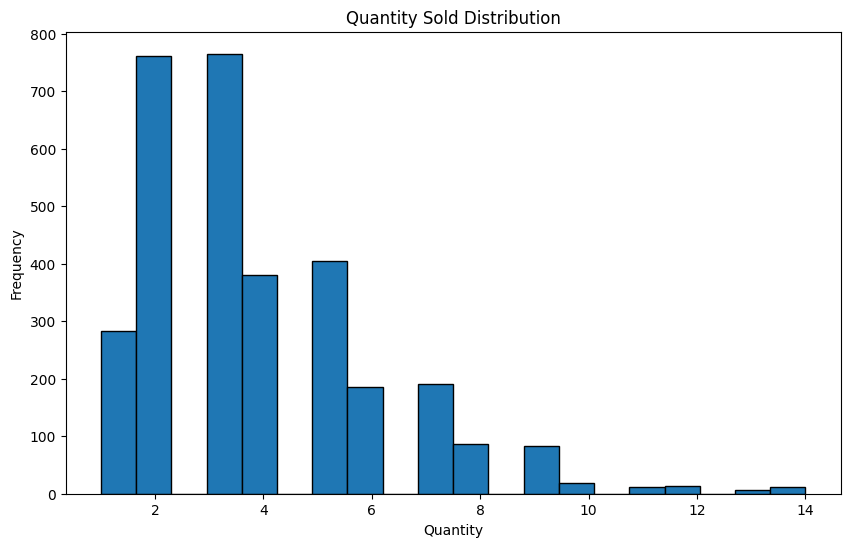

In [98]:
data['Quantity'].plot(kind='hist', bins=20, figsize=(10, 6) , edgecolor='black')
plt.title('Quantity Sold Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


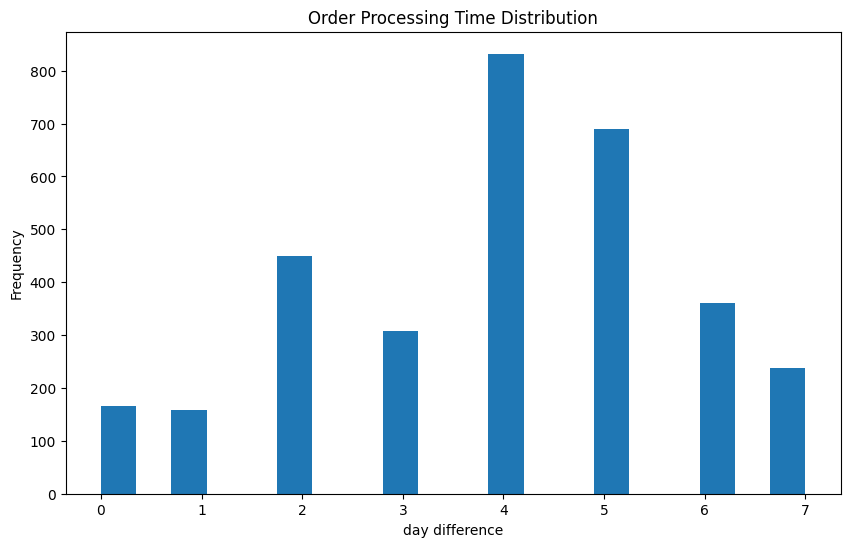

In [99]:
data['Days_Difference'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Order Processing Time Distribution')
plt.xlabel('day difference')
plt.ylabel('Frequency')
plt.show()

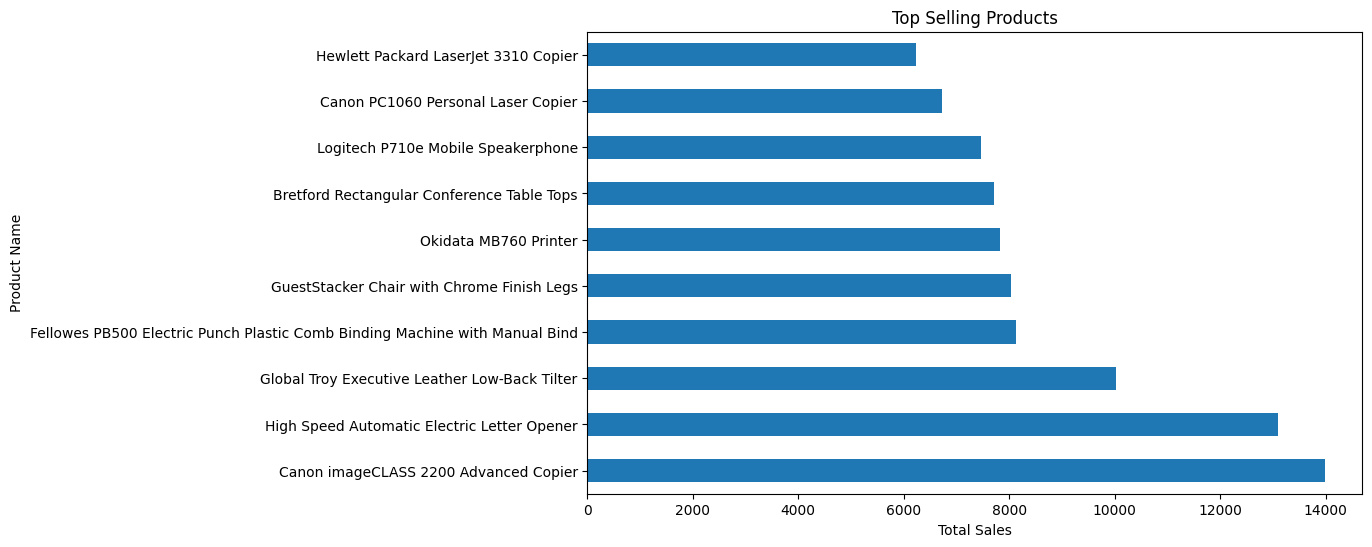

In [100]:
#Top Selling Products
top_products = data.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products.plot(kind='barh', figsize=(10, 6))
plt.title('Top Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


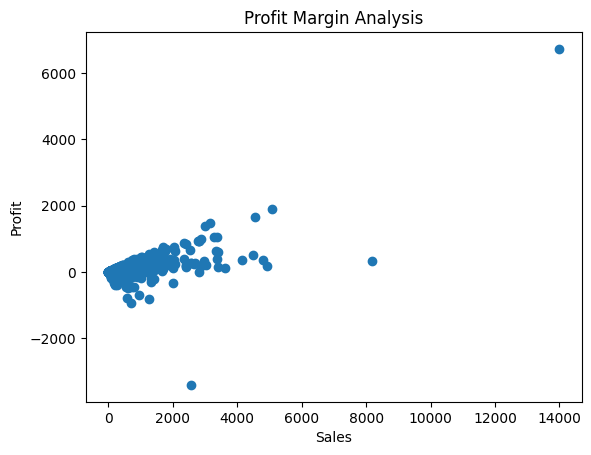

In [101]:
#Profit Margin Analysis
plt.scatter(data['Sales'], data['Profit'])
plt.title('Profit Margin Analysis')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


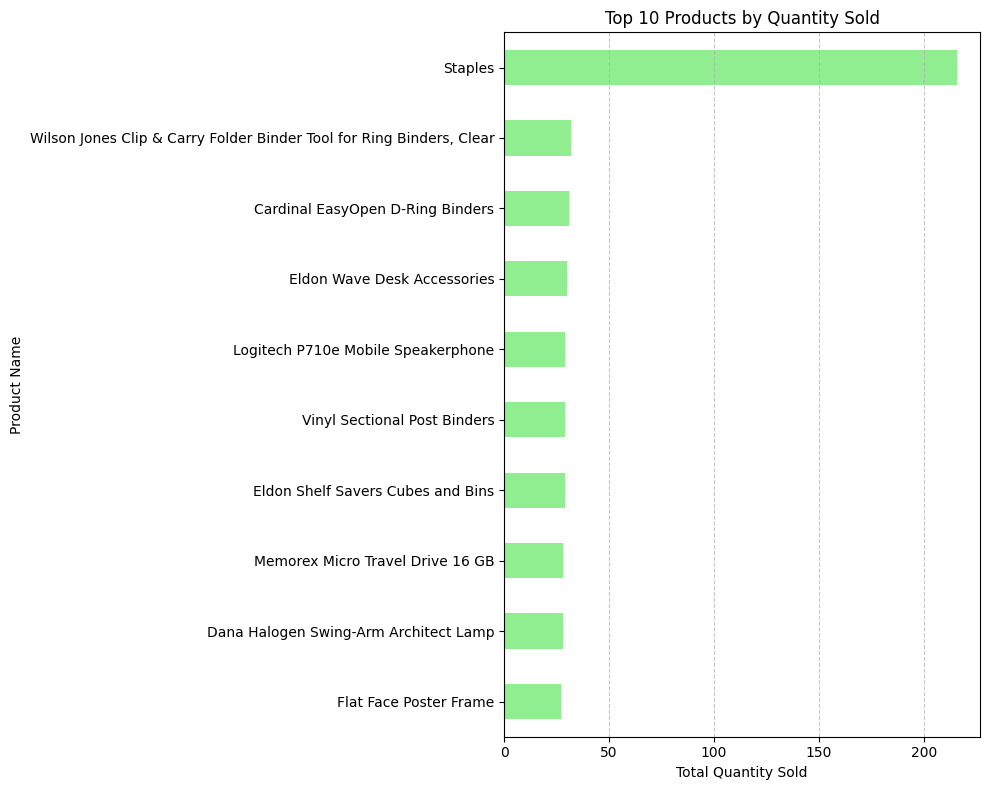

In [102]:
# Group data by product name and calculate total quantity sold
product_quantity_sold = data.groupby('Product Name')['Quantity'].sum()
plt.figure(figsize=(10, 8))
product_quantity_sold.sort_values(ascending=True).tail(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

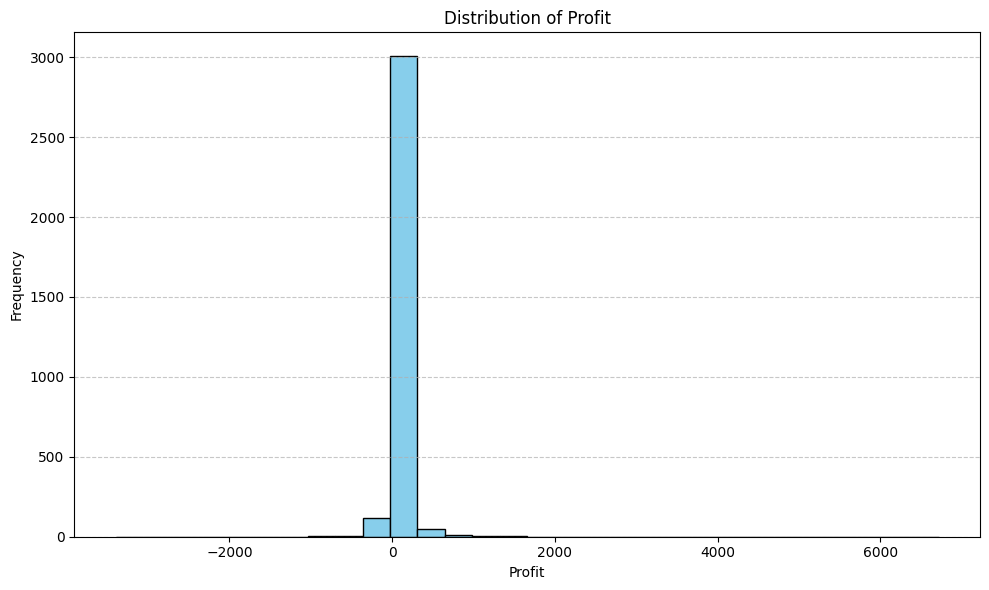

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(data['Profit'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


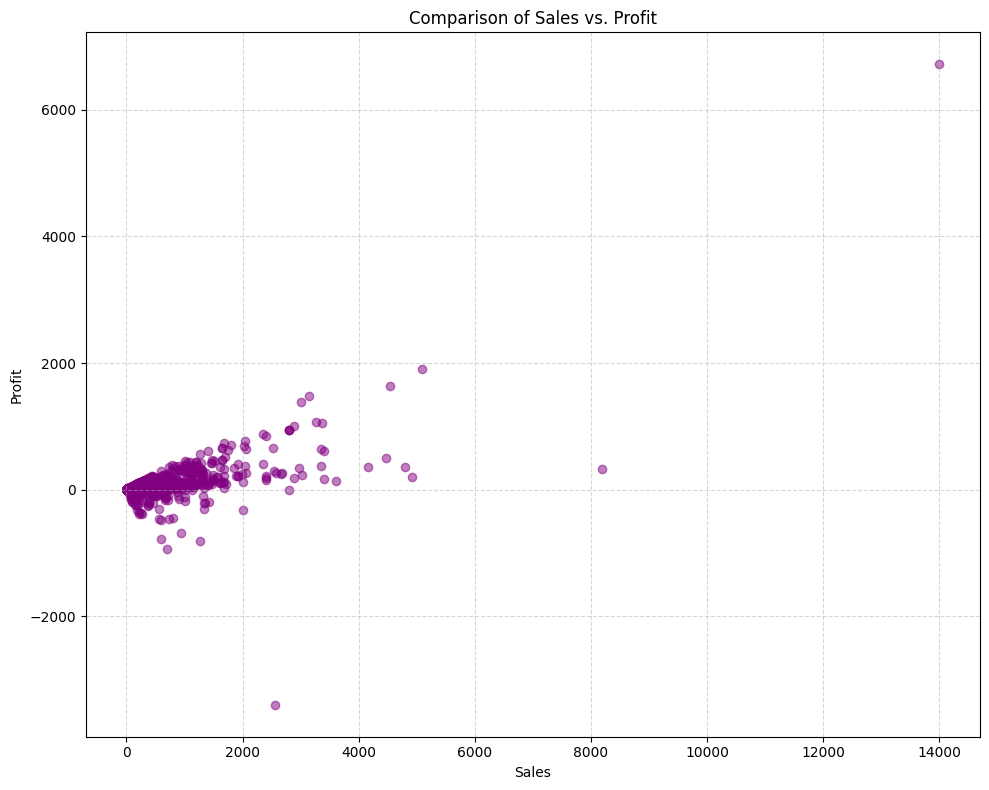

In [104]:
# Plot scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data['Sales'], data['Profit'], alpha=0.5, color='purple')
plt.title('Comparison of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


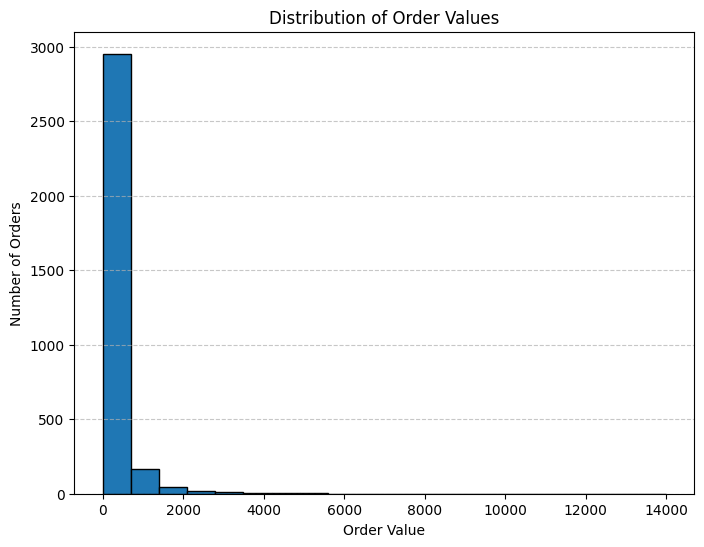

In [105]:
#displaying the distribution of customer ages or demographics.

# Assuming your data is loaded into a pandas dataframe named 'df'
plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=20, edgecolor='black')
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


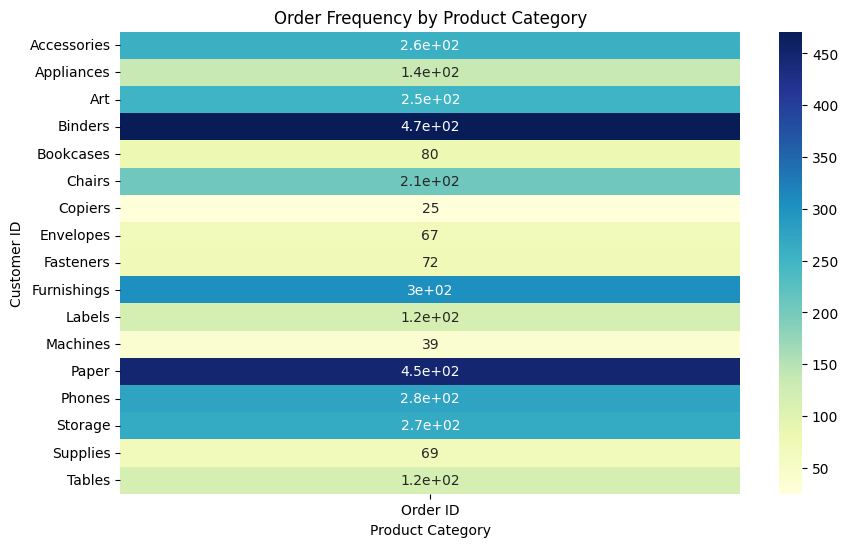

In [106]:
#showcasing the correlation between customer engagement metrics (such as click-through rates) and purchase behavior.

# Create a pivot table to calculate order frequency per category
order_freq = pd.pivot_table(df, index='Category', values='Order ID', aggfunc='count')

# Generate a heatmap using seaborn (assuming it's installed)
plt.figure(figsize=(10, 6))
sns.heatmap(order_freq, annot=True, cmap='YlGnBu')  # Adjust 'cmap' for different color schemes
plt.title('Order Frequency by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Customer ID')
plt.show()


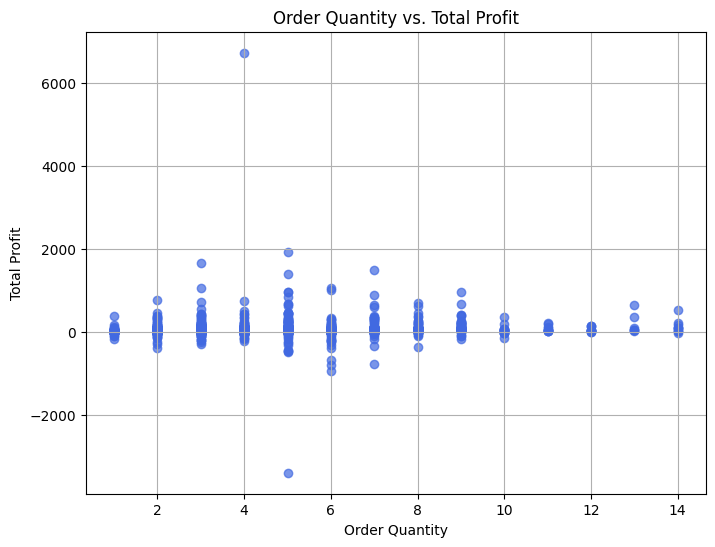

In [107]:
#Scatter plot visualizing the relationship between customer satisfaction scores and repeat purchase frequency.
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Profit'], alpha=0.7, color='royalblue')
plt.title('Order Quantity vs. Total Profit')
plt.xlabel('Order Quantity')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


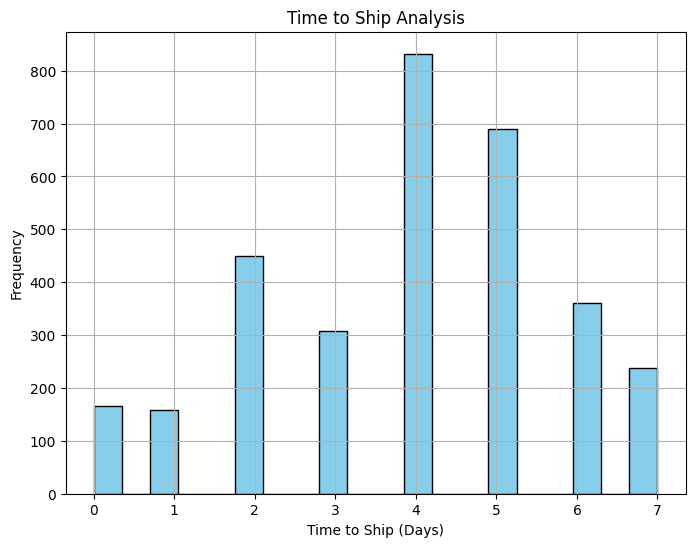

In [108]:
# Assuming 'df' is your DataFrame containing the Amazon dataset
# Convert 'Ship Date' and 'Order Date' columns to datetime objects
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate the time difference in days and assign it to a new column
df['Time to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Plot the histogram for Time to Ship analysis
plt.figure(figsize=(8, 6))
plt.hist(df['Time to Ship'], bins=20, color='skyblue', edgecolor='black')
plt.title('Time to Ship Analysis')
plt.xlabel('Time to Ship (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


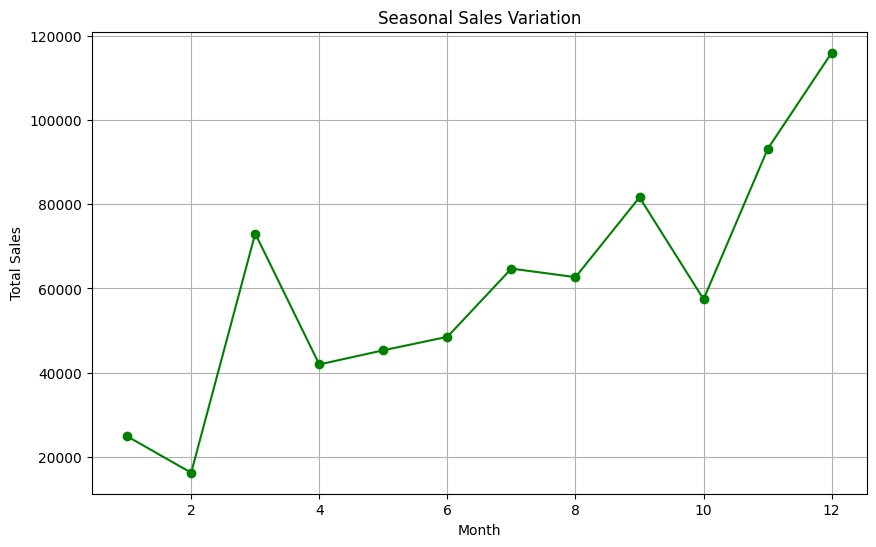

In [109]:
#Seasonal Sales Variation
df['Month'] = df['Order Date'].dt.month

plt.figure(figsize=(10, 6))
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Seasonal Sales Variation')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


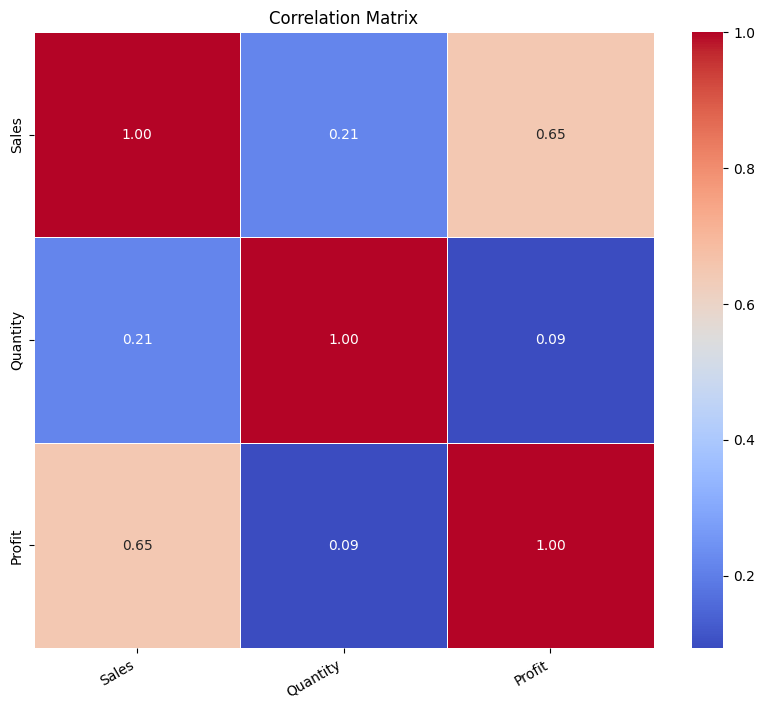

In [110]:
# Assign the columns
columns_of_interest = [ 'Sales', 'Quantity', 'Profit']

# Calculate the correlation matrix--
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

In [111]:
import plotly.graph_objs as go
import plotly.io as pio

# Set Plotly default template
pio.templates.default = "plotly"

# Create a choropleth map for Amazon dataset
amazon_map = go.Figure(go.Choropleth(
    locations = df['Geography'],  # Assuming 'geography' contains country names or codes
    z = df['Sales'],  # Sales data for coloring the map
    locationmode = 'country names',
    colorscale = 'Viridis',  # Consider using 'Viridis' for better sales visualization
    colorbar_title = 'Sales'
))

# Update layout settings
amazon_map.update_layout(
    title_text = 'Sales by Country for Amazon Dataset',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)

# Show the choropleth map
amazon_map.show()


In [112]:
import plotly.graph_objs as go
import plotly.io as pio

# Set Plotly default template
pio.templates.default = "plotly"


In [113]:
#Bar Chart -Total Sales by Category
total_sales_category = go.Figure(go.Bar(x=df['Category'], y=df['Sales'], name='Total Sales', marker_color='skyblue'))
total_sales_category.update_layout(title='Total Sales by Category', xaxis_title='Category', yaxis_title='Total Sales')
total_sales_category.show()

In [114]:
#Histogram -Distribution of Quantity Sold
quantity_distribution = go.Figure(go.Histogram(x=df['Quantity'], marker_color='salmon'))
quantity_distribution.update_layout(title='Distribution of Quantity Sold', xaxis_title='Quantity', yaxis_title='Frequency')
quantity_distribution.show()

In [115]:
#Box Plot -Profit Distribution by Category
profit_distribution_category = go.Figure(go.Box(y=df['Profit'], x=df['Category'], boxmean=True, marker_color='lightgreen'))
profit_distribution_category.update_layout(title='Profit Distribution by Category', xaxis_title='Category', yaxis_title='Profit')
profit_distribution_category.show()

In [116]:
#Bubble Chart -Sales vs Quantity by Product Name
sales_quantity_product = go.Figure(go.Scatter(x=df['Sales'], y=df['Quantity'], mode='markers',
                                               marker=dict(size=df['Sales'], color=df['Quantity'], showscale=True)))
sales_quantity_product.update_layout(title='Sales vs Quantity by Product Name', xaxis_title='Sales', yaxis_title='Quantity')
sales_quantity_product.show()

In [117]:
# 3D Scatter Plot -Sales, Profit, and Quantity
scatter_3d = go.Figure(data=[go.Scatter3d(x=df['Sales'], y=df['Profit'], z=df['Quantity'],
                                           mode='markers', marker=dict(size=5, color='blue'))])
scatter_3d.update_layout(title='3D Scatter Plot of Sales, Profit, and Quantity',
                         scene=dict(xaxis_title='Sales', yaxis_title='Profit', zaxis_title='Quantity'))
scatter_3d.show()

In [118]:
#Stacked Bar Chart - Sales and Profit by Category
stacked_bar = go.Figure(data=[
    go.Bar(name='Sales', x=df['Category'], y=df['Sales']),
    go.Bar(name='Profit', x=df['Category'], y=df['Profit'])
])
stacked_bar.update_layout(title='Sales and Profit by Category', barmode='stack', xaxis_title='Category', yaxis_title='Amount')
stacked_bar.show()

In [119]:
#Violin Plot - Distribution of Sales
violin_sales = go.Figure(go.Violin(y=df['Sales'], box_visible=True, line_color='blue', meanline_visible=True,
                                   fillcolor='lightblue', opacity=0.6))
violin_sales.update_layout(title='Distribution of Sales', yaxis_title='Sales')
violin_sales.show()